In [3]:
import sklearn
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
dic_data = datasets.load_iris(as_frame=True)
dic_data.keys()

df = dic_data['frame']
df_X = dic_data['data']

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df_names = pd.DataFrame(dic_data['target_names'], columns=['species'])
df = pd.merge(df, df_names, left_on='target', right_index=True)
df.drop('target', axis=1, inplace=True)

In [13]:
df_names

,species
0,setosa
1,versicolor
2,virginica


In [14]:
x = df.iloc[:, :-1].values
x[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [15]:
y = df['species']
y[0:10]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
6    setosa
7    setosa
8    setosa
9    setosa
Name: species, dtype: object

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [17]:
from sklearn.svm import SVC as svc
from sklearn.neighbors import KNeighborsClassifier as knc

In [18]:
svc_model=svc()
knn_model=knc(n_neighbors=1)

In [19]:
svc_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
svc_prediction = svc_model.predict(x_test)
knn_prediction = knn_model.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
cm_svc = confusion_matrix(svc_prediction, y_test, labels=dic_data['target_names'])

In [23]:
print(cm_svc)

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

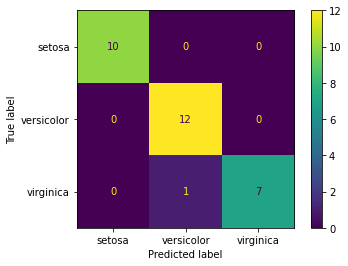

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=dic_data['target_names'])
disp.plot()

In [27]:
cm_knn = confusion_matrix(knn_prediction, y_test, labels=dic_data['target_names'])

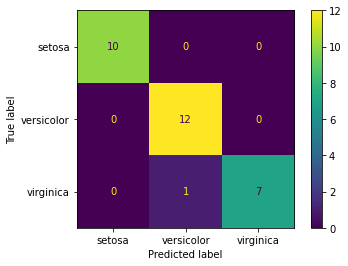

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=dic_data['target_names'])
disp.plot()

In [29]:
accuracy_score(svc_prediction, y_test)

0.9666666666666667

In [30]:
accuracy_score(knn_prediction, y_test)

0.9666666666666667

In [32]:
print(classification_report(svc_prediction, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [37]:
knn_model=knc(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_test)
print(accuracy_score(knn_prediction, y_test))

0.9666666666666667


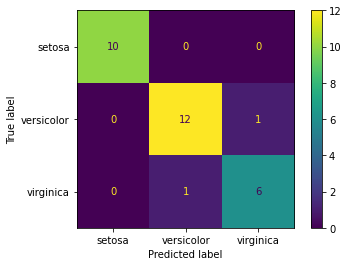

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction)

In [38]:
dfm = pd.read_csv('mushrooms.csv', sep=";")
dfm

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,NaN,[g],[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,NaN,[g],"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,NaN,[g],[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]"
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,NaN,NaN,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s]


In [39]:
xm = dfm.iloc[:,3:6].values
ym = dfm['class']
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.20, random_state=10)

In [40]:
svc_model_m = svc()
knn_model_m = knc(n_neighbors=1)

In [41]:
knn_model_m.fit(xm_train, ym_train)

ValueError: could not convert string to float: '[3, 5]'

In [42]:
dfm[['min-cap-diameter', 'max-cap-diameter']] = pd.DataFrame(
    dfm['cap-diameter'].apply(lambda x: eval(x)).tolist(),
    index=dfm.index
)

In [43]:
dfm

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season,min-cap-diameter,max-cap-diameter
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]",10.0,20.0
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,[w],[u],[w],[t],[p],NaN,[d],"[u, a]",5.0,10.0
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]",10.0,15.0
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[w],[u],[w],[t],[g],NaN,[d],"[u, a]",5.0,15.0
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]",5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]",2.0,6.0
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]",2.0,4.0
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]",5.0,15.0
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s],3.0,8.0


In [44]:
dfm['cap-shape']=dfm['cap-shape'].str.replace(r"\[|\]","", regex=True).str.split(",").apply(lambda x: [e.strip() for e in x]).tolist()

In [46]:
dfm['cap-shape']

0         [x, f]
1         [p, x]
2         [x, f]
3         [x, f]
4         [x, f]
         ...    
168          [o]
169          [o]
170          [o]
171    [p, c, o]
172    [x, f, s]
Name: cap-shape, Length: 173, dtype: object

In [47]:
dfm = dfm.explode('cap-shape')
dfm

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season,min-cap-diameter,max-cap-diameter
0,Amanita Family,Fly Agaric,p,"[10, 20]",x,"[g, h]","[e, o]",[f],[e],NaN,...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]",10.0,20.0
0,Amanita Family,Fly Agaric,p,"[10, 20]",f,"[g, h]","[e, o]",[f],[e],NaN,...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]",10.0,20.0
1,Amanita Family,Panther Cap,p,"[5, 10]",p,[g],[n],[f],[e],NaN,...,[w],[u],[w],[t],[p],NaN,[d],"[u, a]",5.0,10.0
1,Amanita Family,Panther Cap,p,"[5, 10]",x,[g],[n],[f],[e],NaN,...,[w],[u],[w],[t],[p],NaN,[d],"[u, a]",5.0,10.0
2,Amanita Family,False Panther Cap,p,"[10, 15]",x,NaN,"[g, n]",[f],[e],NaN,...,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]",10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Morel Family,Common Morel,e,"[3, 8]",c,NaN,"[n, g]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s],3.0,8.0
171,Morel Family,Common Morel,e,"[3, 8]",o,NaN,"[n, g]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s],3.0,8.0
172,Jelly Discs Family,Jelly Babies,p,"[1, 1.5]",x,[s],[y],[f],[f],[f],...,[y],NaN,NaN,[f],[f],NaN,[d],"[u, a]",1.0,1.5
172,Jelly Discs Family,Jelly Babies,p,"[1, 1.5]",f,[s],[y],[f],[f],[f],...,[y],NaN,NaN,[f],[f],NaN,[d],"[u, a]",1.0,1.5


In [48]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
dfm['cap-shape'] = le.fit_transform(dfm['cap-shape'])
dfm['cap-shape'].unique()

array([6, 2, 4, 0, 1, 5, 3], dtype=int64)

Con el dataset "exploded", realice la limpieza de datos que considere necesaria, crear un modelo en al menos dos algoritmos de clasificacion, relacionado a si es posible predecir que hongos son comestibles por las caracteristicas que describe el dataset.  Analice los resultados y justifique sus resultados finales, y cual considera que es el mejor algoritmo.  Incluya graficas, matrices de confusion, informes de prediccion, etc.  Utilice al menos 4 variables 

Debe de entregar un notebook con el contenido de las transformaciones que realizo e incluyendo las graficas y/o tablas necesarias para justificar su respuesta.